In [5]:
!conda install -c conda-forge scikit-learn imbalanced-learn shap -y

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import shap
import pandas as pd # pandas: For data loading and manipulation
import seaborn as sns # seaborn & matplotlib.pyplot: For data visualization.
import matplotlib.pyplot as plt 


In [7]:
# Step 2: Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
# Show first 5 rows 
print(df.head()) 
 
# Dataset info: rows, columns, data types, missing values 
print(df.info())

# Summary statistics for numerical columns 
print(df.describe()) 
 
# Check missing values 
print(df.isnull().sum()) 


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [9]:
# Step 3: Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

C:\Users\FUNMILAYO ITUAH\AppData\Local\Temp\ipykernel_13972\2627980812.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [10]:
# Encode categorical variables safely
if 'customerID' in df.columns:
    df = pd.get_dummies(df.drop('customerID', axis=1), drop_first=True)
else:
    df = pd.get_dummies(df, drop_first=True)

In [11]:
# Encode categorical variables (ignore if column is missing)
df = pd.get_dummies(df.drop('customerID', axis=1, errors='ignore'), drop_first=True)

# Before encoding
print("Columns before encoding:")
print(df.columns.tolist())

# After encoding
df_encoded = pd.get_dummies(df.drop('customerID', axis=1, errors='ignore'), drop_first=True)

print("\nColumns after encoding:")
print(df_encoded.columns.tolist())

Columns before encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Columns after encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'Multiple

Categorical columns before encoding:
[]

Columns after encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Number of columns before encoding: 31
Number of columns after encoding: 31


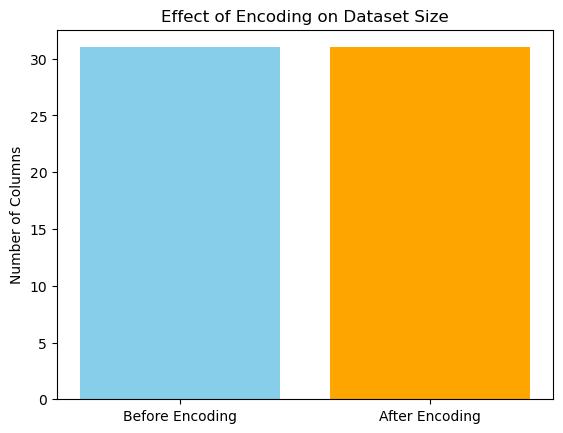

In [12]:
# Keep a copy of the raw dataframe (before encoding)
df_raw = df.copy()

# Show categorical columns before encoding
print("Categorical columns before encoding:")
print(df_raw.select_dtypes(include=['object']).columns.tolist())

# Apply encoding (ignore if 'customerID' is missing)
df_encoded = pd.get_dummies(df_raw.drop('customerID', axis=1, errors='ignore'), drop_first=True)

# Show all columns after encoding
print("\nColumns after encoding:")
print(df_encoded.columns.tolist())

# Optional: Compare number of columns before vs after
print(f"\nNumber of columns before encoding: {df_raw.shape[1]}")
print(f"Number of columns after encoding: {df_encoded.shape[1]}")

# Optional visualisation of column expansion
import matplotlib.pyplot as plt

plt.bar(['Before Encoding','After Encoding'], [df_raw.shape[1], df_encoded.shape[1]], color=['skyblue','orange'])
plt.ylabel("Number of Columns")
plt.title("Effect of Encoding on Dataset Size")
plt.show()

In [13]:
# Step 5: Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


NameError: name 'X_train' is not defined

In [ ]:
# Step 6: Standardisation
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


In [ ]:
# Step 7: Define models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)

In [ ]:
# Step 8: Hyperparameter tuning (example for RF)
param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20, None],
              'min_samples_split': [2, 5]}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=cv, scoring='roc_auc')
grid_rf.fit(X_train_res, y_train_res)

best_rf = grid_rf.best_estimator_

In [ ]:
# Step 9: Evaluate
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

In [ ]:
# Step 10: Explainability with SHAP
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

Descriptive Statistics / EDA

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


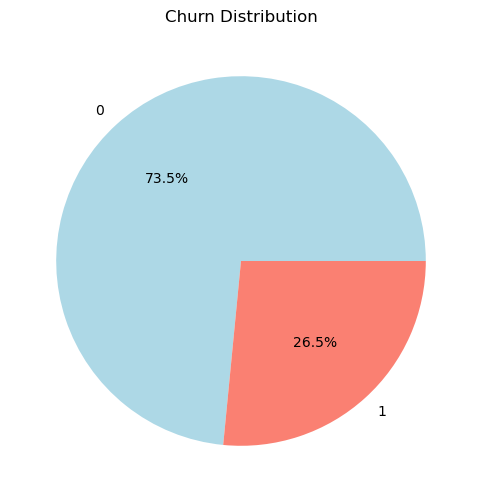

In [90]:
# Churn Distribution - Purpose: Shows the proportion of churners vs non-churners and supports your statement about imbalance (~26% churners).

# Count & percentage
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

# Pie chart
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue','salmon'], figsize=(6,6))
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

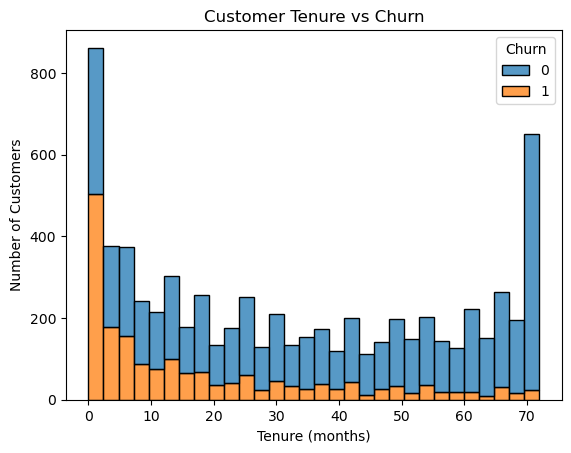

In [104]:
# Tenure vs Churn - Purpose: Highlight that short-tenure customers are more likely to churn.

sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title('Customer Tenure vs Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

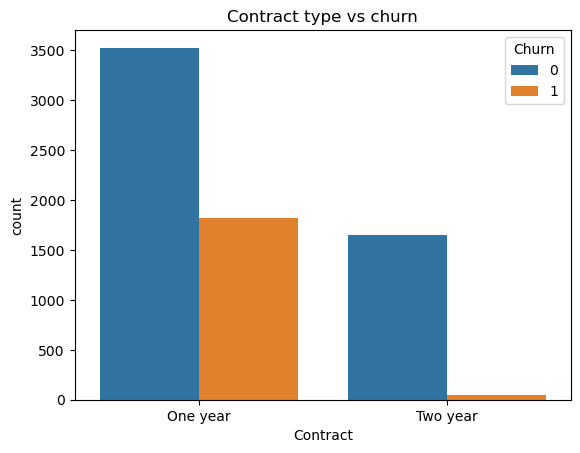

In [146]:
# Contract type vs churn:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract type vs churn')
plt.show()

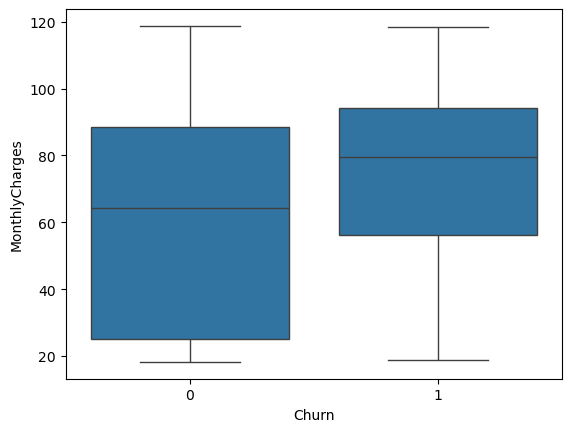

In [148]:
# Monthly Charges vs Churn 
# MonthlyCharges distribution by Churn:

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()

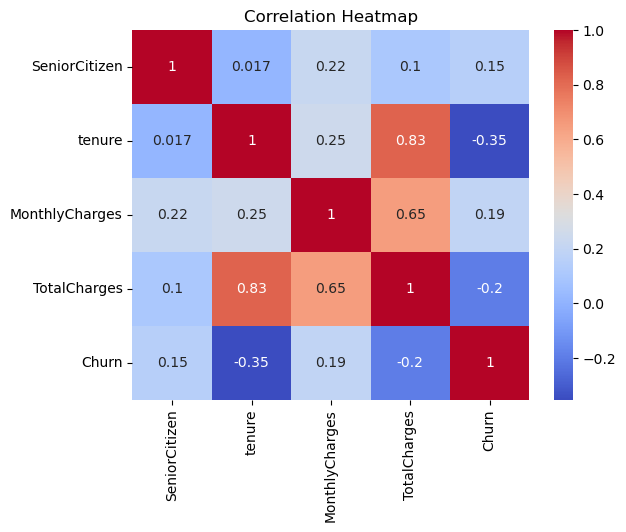

In [124]:
# Correlation Heatmap (Numeric Features) - Purpose: Explore relationships between numerical variables (MonthlyCharges, TotalCharges, tenure).

# Correlation heatmap (numerical features only) 
corr = df.select_dtypes(include=['float64', 'int64']).corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap') 
plt.show() 


Model Performance

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Random Forest with fixed random state
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = cm.ravel()

print("Confusion Matrix Results:")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [152]:
# Performance Metrics Tables - Accuracy, Precision, Recall, F1-score, ROC-AUC for RF, LR, SVM:
# Purpose: Supports the statement about predictive performance.

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC RF:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1552
           1       0.47      0.72      0.57       561

    accuracy                           0.71      2113
   macro avg       0.67      0.71      0.67      2113
weighted avg       0.77      0.71      0.72      2113

ROC-AUC RF: 0.7594553402429389


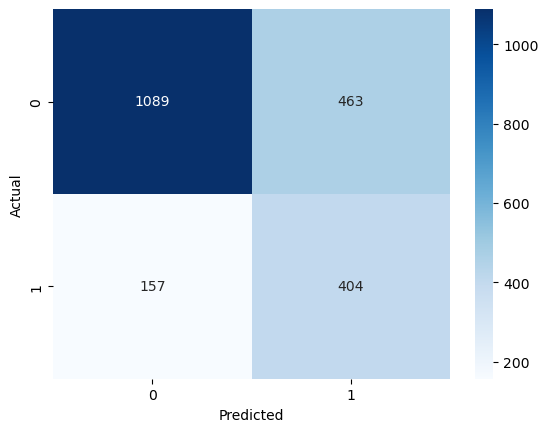

In [154]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

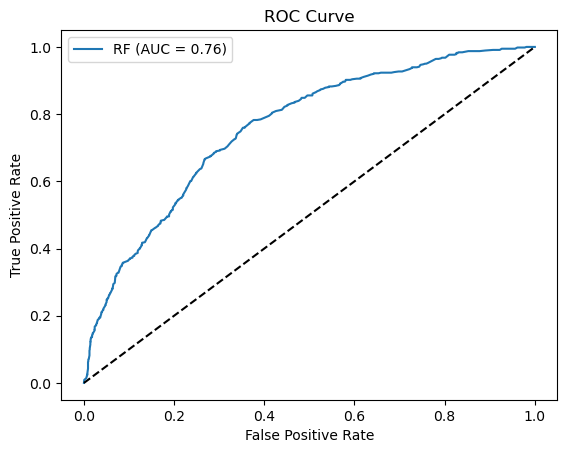

In [156]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = {:.2f})'.format(roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [166]:
# Feature Importance & SHAP
# RF Feature Importance Table - Purpose: Shows which features most affect churn.

importances = pd.DataFrame({'feature': X.columns, 'importance': best_rf.feature_importances_})
importances.sort_values(by='importance', ascending=False, inplace=True)
print(importances.head(10))

                           feature  importance
3                     TotalCharges    0.163722
1                           tenure    0.152521
2                   MonthlyCharges    0.128732
28  PaymentMethod_Electronic check    0.095084
10     InternetService_Fiber optic    0.050696
26            PaperlessBilling_Yes    0.049951
25               Contract_Two year    0.043964
4                      gender_Male    0.025645
24               Contract_One year    0.023167
9                MultipleLines_Yes    0.022376


In [ ]:
# SHAP Summary Plot - Purpose: Provides interpretable, visual explanation linking model outputs to managerial insights.
import shap
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
# SHAP Dependence Plot for key features - Visualize interactions between features (e.g., Contract type & tenure).
shap.dependence_plot('Contract_Month-to-month', shap_values[1], X_test, feature_names=X.columns)

In [ ]:
# Train-Test Split & SMOTE - Purpose: Show class balancing step.

print("Original train shape:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_res.shape, y_train_res.shape)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
# ROC Curve Comparison (RF, LR, SVM) - Purpose: Compare models’ discrimination ability.

from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1])

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:,1])
auc_lr = roc_auc_score(y_test, best_lr.predict_proba(X_test)[:,1])

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm.predict_proba(X_test)[:,1])
auc_svm = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:,1])

plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC={auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [ ]:
# Model Performance Table - Purpose: Shows all key metrics in one table.

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

models = {'RF': best_rf, 'LR': best_lr, 'SVM': best_svm}
performance = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    performance.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

perf_df = pd.DataFrame(performance)
print(perf_df)

Feature Importance & Explainability

In [1]:
# Random Forest Feature Importance - Purpose: Highlight which features drive churn.

importances = pd.DataFrame({'feature': X.columns, 'importance': best_rf.feature_importances_})
importances.sort_values(by='importance', ascending=False, inplace=True)
sns.barplot(x='importance', y='feature', data=importances.head(10))
plt.title('Top 10 Features (Random Forest)')
plt.show()


NameError: name 'pd' is not defined

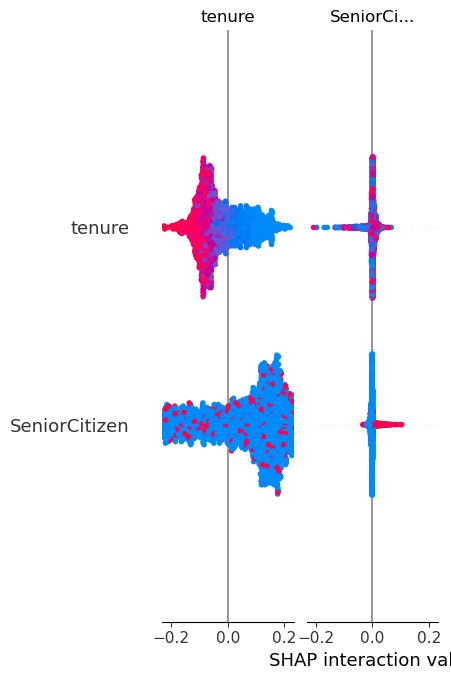

In [46]:
# SHAP Summary Plot - 

import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Dictionary to store all results
results = {}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True)
}

# Train, Predict, and Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Compare results in a table
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison Table:")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# Plot comparison
results_df.plot(kind='bar', figsize=(12,6), title='Model Performance Comparison')
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Feature Importance (Random Forest Only)
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Top 15 features
top_n = 15
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:top_n], y=features[indices][:top_n])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

NameError: name 'X_train' is not defined

In [3]:
# === 5. Critical Analysis ===

# Import libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import shap
from imblearn.over_sampling import SMOTE

# Define models
rf_model = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit baseline models
rf_model.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# === K-Fold Cross Validation ===
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())

# === Hyperparameter Tuning (Grid Search) ===
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# === Model Comparison Table ===
def get_metrics(model, X, y):
    y_pred = model.predict(X)
    return [
        accuracy_score(y, y_pred),
        precision_score(y, y_pred),
        recall_score(y, y_pred),
        f1_score(y, y_pred)
    ]

log_metrics = get_metrics(log_reg, X_test, y_test)
rf_metrics = get_metrics(rf_model, X_test, y_test)

comparison_df = pd.DataFrame(
    [log_metrics, rf_metrics],
    columns=["Accuracy", "Precision", "Recall", "F1-score"],
    index=["Logistic Regression", "Random Forest"]
)
print("\nModel Comparison:\n")
print(comparison_df)

# === Optional Improvements ===
# Check Class Imbalance
print(y.value_counts(normalize=True))

# Apply SMOTE if needed
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# === SHAP Analysis ===
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values[1], X_test)

# SHAP force plot for a single example
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

ImportError: cannot import name 'LogisticRegression' from 'sklearn.ensemble' (C:\Users\FUNMILAYO ITUAH\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\__init__.py)